### Imports

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Leitura da imagem + converção pra RGB

In [46]:

img = cv2.imread("olhos_verdes.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(3096, 5416, 3)

### Definindo escala dos canais

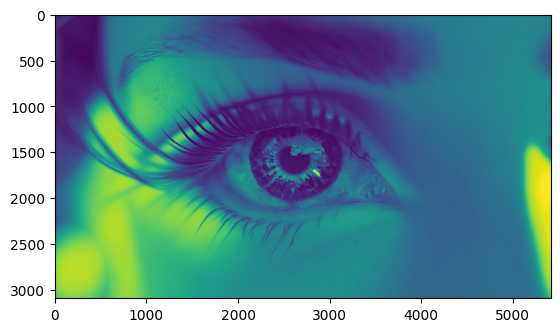

In [47]:
(r,g,b) = cv2.split(img)
r,g,b = r/255, g/255, b/255
plt.imshow(r)

### Definindo componentes

In [48]:
pca_components = 50
pca_r = PCA(n_components=pca_components)
r_reduce = pca_r.fit_transform(r)

pca_g = PCA(n_components=pca_components)
g_reduce = pca_g.fit_transform(g)

pca_b = PCA(n_components=pca_components)
b_reduce = pca_b.fit_transform(b)

In [49]:
juntos = np.asarray([r_reduce, g_reduce, b_reduce])

In [50]:
recon_r = pca_r.inverse_transform(r_reduce)
recon_g = pca_g.inverse_transform(g_reduce)
recon_b = pca_b.inverse_transform(b_reduce)

### Reescala para valores de pixel entre 0 e 255 (mas aumenta tamanho do arquivo e o mantem com um aspecto azulado)

In [51]:
# recon_r = cv2.normalize(recon_r, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# recon_g = cv2.normalize(recon_g, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
# recon_b = cv2.normalize(recon_b, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


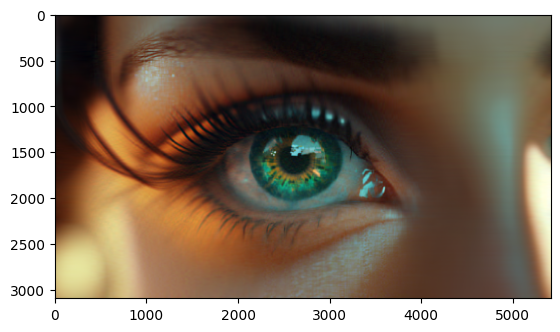

In [52]:
img_recon = cv2.merge((recon_r, recon_g,recon_b))
# img_recon = cv2.cvtColor(img_recon, cv2.COLOR_RGB2BGR) # essa linha ajusta o aspecto azulado para as cores padrões 
plt.imshow(img_recon)

In [53]:
cv2.imwrite("olhos_verdes_reduce.jpg", img_recon)

True

### Resultado Final:

Após o processamento, o tamanho da imagem diminuiu bastante, passando de 1.63 MB para 273 KB.

Porém a normalização dos pixels acabou abaixando todos os pixels para um valor próximo do preto. Fazendo com que a imagem salva fique tudo muito próximo do preto.